# Simple Linear Regression

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize']=(20,10)

In [5]:
# Read your data
file=pd.read_csv('C:/Users/user/Downloads/headbrain.csv')

In [6]:
file

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [7]:
file.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [8]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [9]:
file.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [10]:
# Collecting X and Y
X=file['Head Size(cm^3)'].values
Y=file['Brain Weight(grams)'].values

# Calculating bo and b1

In [11]:
# Mean of x and y
mean_x=np.mean(X)
mean_y=np.mean(Y)

# Total number of values 
M=len(X)

# Formula for calculating b1 and b0
numer=0
denom=0
for i in range(M):
    numer+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2
b1=numer/denom
b0=mean_y-(b1*mean_x)

# Printing out the coefficient of b1 and b0.
print(b0,',',b1)

print('y=',b0,'+',b1,'(X)')


325.57342104944223 , 0.26342933948939945
y= 325.57342104944223 + 0.26342933948939945 (X)


# Plotting the Regression Line.

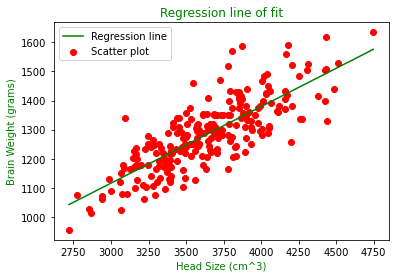

"max_x=np.max(X)+100\nmin_x=np.min(X)-100\n\n# Calculating the line values of x and y.\nx=np.linspace(min_x,max_x,100)\ny=b0+b1*x\n\n# Plotting the line plot\nplt.plot(x,y, color='g', label='Regression line')\n\n# Plotting the scatter plot\nplt.scatter(X,Y, color='r', label='Scatter plot')\n\n# Plotting the labels and title.\nplt.title('Regression line of fit', color='g')\nplt.xlabel('Head Size (cm^3)',color='g')\nplt.ylabel('Brain Weight (grams)',color='g')\nplt.legend()\nplt.show()"

In [12]:
max_x=np.max(X)
min_x=np.min(X)

# Calculating the line values of x and y.
x=np.linspace(min_x,max_x) # (2720,4747)
y=b0+b1*x

# Plotting the line plot
plt.plot(x,y, color='g', label='Regression line')

# Plotting the scatter plot
plt.scatter(X,Y, color='r', label='Scatter plot')

# Plotting the labels and title.
plt.title('Regression line of fit', color='g')
plt.xlabel('Head Size (cm^3)',color='g')
plt.ylabel('Brain Weight (grams)',color='g')
plt.legend()
plt.show()

# The code below also works but i editted and tried runnig it in the code above; and woow,it works.
'''max_x=np.max(X)+100
min_x=np.min(X)-100

# Calculating the line values of x and y.
x=np.linspace(min_x,max_x,100)
y=b0+b1*x

# Plotting the line plot
plt.plot(x,y, color='g', label='Regression line')

# Plotting the scatter plot
plt.scatter(X,Y, color='r', label='Scatter plot')

# Plotting the labels and title.
plt.title('Regression line of fit', color='g')
plt.xlabel('Head Size (cm^3)',color='g')
plt.ylabel('Brain Weight (grams)',color='g')
plt.legend()
plt.show()'''

# Calculating the R-squared

In [13]:
SS_T=0 # Sum of Square Total
SS_R=0 # Sum of Square Regression
for i in range(M):
    y_pred=b0+b1*X[i] # predicted y = b0+b1(X)
    SS_T+=(Y[i]-mean_y)**2 # Sum of Square Total=(y-ybar)^2
    SS_R+=(Y[i]-y_pred)**2 # Sum of Square Regression=(y-(y = b0+b1(X))) # y-predicted y
R_squared=np.round(1- (SS_R/SS_T),4) #*100
print('R_squared is:',R_squared)

R_squared is: 0.6393


# Calculating the Adjusted R-squared¶

In [14]:
# I did it myself and it was a success, I ran same data with SPSS and i got same values. Hurray to me.
n=M
k=1
q= (R_squared-(k/(n-1))) 
r= ((n-1)/(n-k-1)) 
Adj_R_squared=np.round((q*r),4) # The function will round Adj_R_squared to 4 d.p.
print ('Adj_R_squared is:',Adj_R_squared)

Adj_R_squared is: 0.6378


# Logistic Linear Regression

In [15]:
# I am re-importing just to serve as a reminder, i don't need to import the libraries if i have done before.
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
# plt.rcParams['figure.figsize']=(20,10)

In [16]:
# To read a file, the correct directory must be provided for pandas to have access to pick the file.
file2=pd.read_csv('C:/users/user/Downloads/titanic/train.csv')

In [17]:
file2.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [18]:
print('There are', len(file2), 'passenger in the titanic ship')

There are 891 passenger in the titanic ship


<AxesSubplot:xlabel='Survived', ylabel='count'>

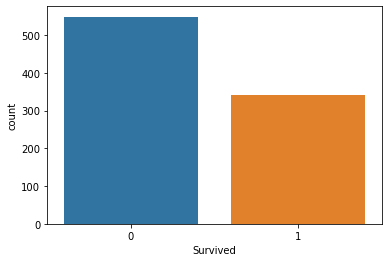

In [19]:
# Analysing the data graphically using seaborn
sns.countplot(x='Survived', data=file2)

<AxesSubplot:xlabel='Survived', ylabel='count'>

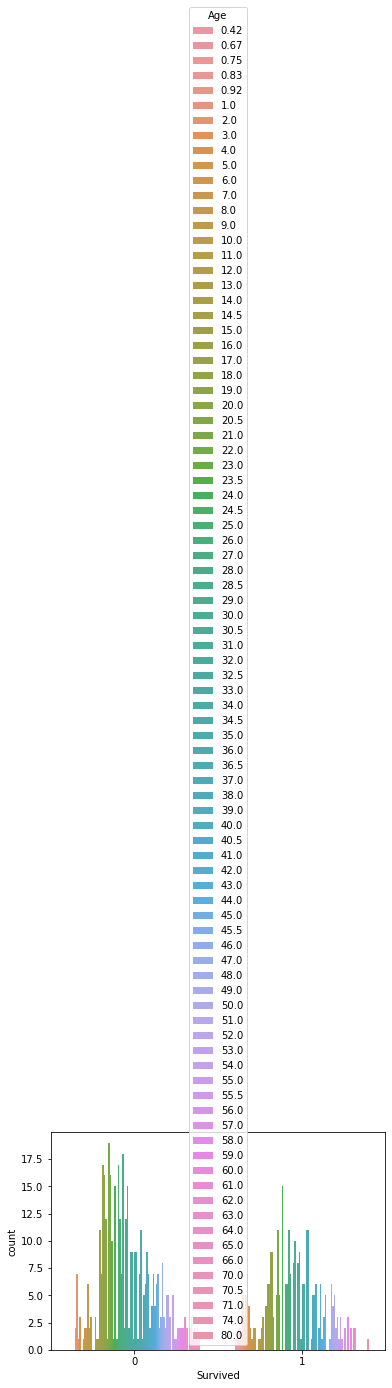

In [20]:
sns.countplot(x='Survived', hue='Age', data=file2)

<AxesSubplot:xlabel='Survived', ylabel='count'>

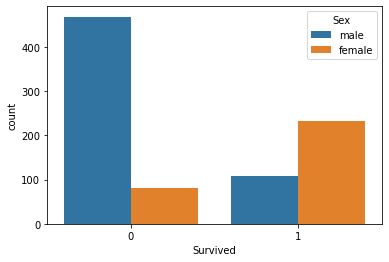

In [21]:
sns.countplot(x='Survived', hue='Sex', data=file2)

<AxesSubplot:xlabel='Survived', ylabel='count'>

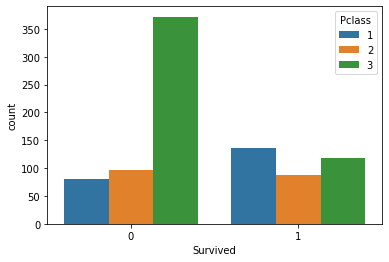

In [22]:
sns.countplot(x='Survived', hue='Pclass', data=file2)

<AxesSubplot:ylabel='Frequency'>

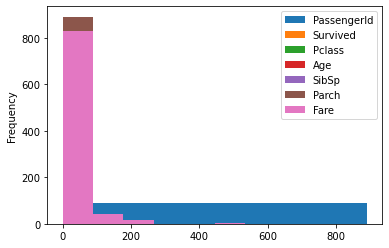

In [23]:
# To plot histogram using pandas
file2.plot.hist()

<AxesSubplot:ylabel='Frequency'>

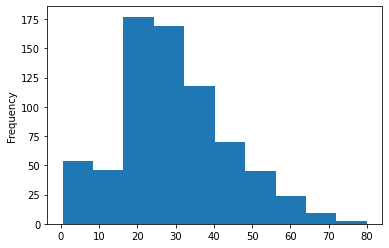

In [24]:
file2['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

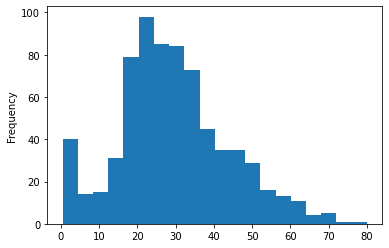

In [25]:
file2['Age'].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

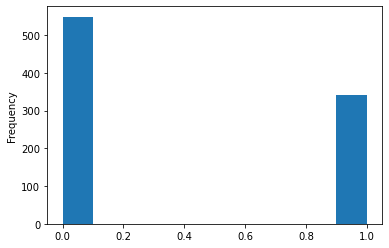

In [26]:
file2['Survived'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

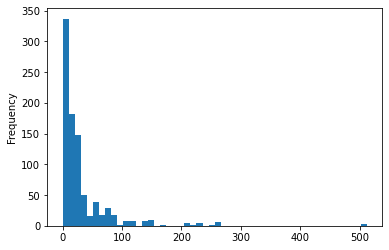

In [27]:
file2['Fare'].plot.hist(bins=50)

# Data Wrangling A.K.A (Data Cleaning)

In [28]:
# To check for null values, we use the isnull() function and it returns a boolean.
file2.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
# To check the number of null values in each columns.
file2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

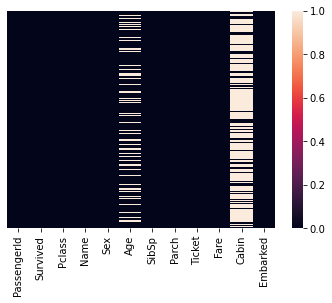

In [30]:
# To create a heatmap of the null value in the DataFrame for better view, we use seaborn.
# yticklabels remove the labels  on the y axis and makes it blank, code will run without it.
sns.heatmap(file2.isnull(), yticklabels=False) 

<AxesSubplot:>

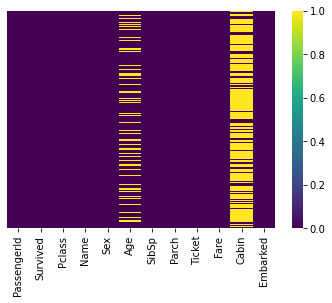

In [31]:
# To create a heatmap of the null value in the DataFrame for a more better and colorized view.
sns.heatmap(file2.isnull(), yticklabels=False, cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

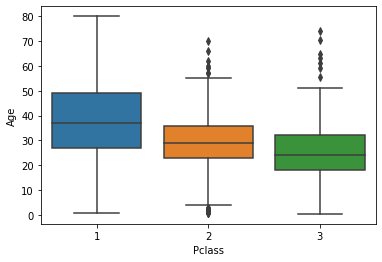

In [32]:
# We make a boxplot of some selected columns.
sns.boxplot(x='Pclass',y='Age', data=file2)

In [33]:
# To drop the columns with NaN, we call the drop function which automatically remove the columns with NaN.
file2.drop('Cabin',axis=1,inplace=True)

In [34]:
file2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [35]:
file2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<AxesSubplot:>

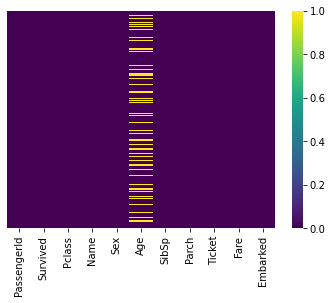

In [36]:
sns.heatmap(file2.isnull(), yticklabels=False, cmap='viridis')

In [37]:
file2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [38]:
# To drop the row with NaN, we call the dropna function which remove individual rows with NaN.
file2.dropna(inplace=True)

In [39]:
file2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [40]:
file2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

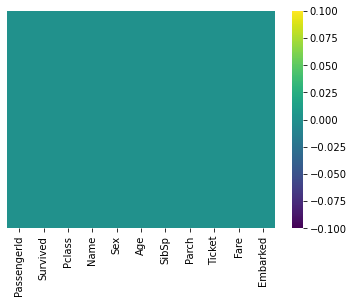

In [41]:
sns.heatmap(file2.isnull(), yticklabels=False, cmap='viridis')

In [42]:
'''I am converting to categorical variable because i am dealing with logistics regression and there should 
be no strings in my data'''
# Here we are converting the Sex into a categorical variable.
pd.get_dummies(file2['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [43]:
'''After converting the Sex into a categorical variable, i am trying to combine both variable as 1.
i.e instead of having the column for male and female, i'll have just one column where female=0 and male=1.'''
Gender=pd.get_dummies(file2['Sex'], drop_first=True)
Gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
885,0
886,1
887,0
889,1


In [44]:
pd.get_dummies(file2['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
885,0,1,0
886,0,0,1
887,0,0,1
889,1,0,0


In [45]:
'''After converting the Embarked into a categorical variable, i am trying to combine the variable.
i.e instead of having the 3 columns, i'll have just two column.'''
Embark=pd.get_dummies(file2['Embarked'], drop_first=True)
Embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
885,1,0
886,0,1
887,0,1
889,0,0


In [46]:
pd.get_dummies(file2['Pclass'])

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
885,0,0,1
886,0,1,0
887,1,0,0
889,1,0,0


In [47]:
'''After converting the Pclass into a categorical variable, i am trying to combine the variable.
i.e instead of having the 3 columns, i'll have just two column.'''
Class=pd.get_dummies(file2['Pclass'], drop_first=True)
Class

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
885,0,1
886,1,0
887,0,0
889,0,0


In [48]:
file2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [49]:
# Now we concatenate the dummies to the DataFrame using pd.concat().
file2=pd.concat([file2,Gender,Embark,Class],axis=1)

In [50]:
file2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,0,1,0,0,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0,0,0


In [51]:
file2.drop(['Pclass','Name','Sex','Ticket','Fare','Embarked','PassengerId'],axis=1,inplace=True)

In [52]:
file2

,Survived,Age,SibSp,Parch,male,Q,S,2,3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,0,1,0,0,1
886,0,27.0,0,0,1,0,1,1,0
887,1,19.0,0,0,0,0,1,0,0
889,1,26.0,0,0,1,0,0,0,0


## Train Data

In [54]:
X=file2.drop('Survived',axis=1)
y=file2['Survived']

In [17]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y testsize=0.3, random_state=1)

SyntaxError: invalid syntax (2216143409.py, line 2)

In [10]:
from sklearn.linear_model import LogisticRegression

In [14]:
logmodel= LogisticRegression()

In [15]:
logmodel.fit(X_train,y_train)

NameError: name 'X_train' is not defined